In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_text = pd.read_csv('SMSCollection.csv')

In [3]:
df_text


,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Steps to be followed in the project
## 1. Data cleaning
##  2. EDA
##  3. Text Preprocessing
##  4. Model building
##  5. Evaluation
##  6. Improvement
## 7. Website
## 8. Deploy

In [4]:
# Let's start

### *1. Data Cleaning*

In [5]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df_text.isnull().sum()

Class    0
sms      0
dtype: int64

In [7]:
# no null values which we can also see in the info part

In [8]:
df_text.duplicated().sum()

403

In [9]:
# so there are total 403 duplicated entries so lets drop all the duplicated rows first

In [10]:
df_text.drop_duplicates(inplace=True)

In [11]:
df_text

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df_text.duplicated().sum()

0

In [13]:
# so all the duplicates rows are dropped successfully

In [14]:
# now lets change the class values from (ham,spam) to (0,1)

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
encoder.fit_transform(df_text['Class'])

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
df_text['Class'] = encoder.fit_transform(df_text['Class'])

In [18]:
df_text

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2. EDA

In [19]:
# The cleaning part is done 
# Now we will perform EDA

In [20]:
# lets check the counts of the spam and ham msgs
df_text['Class'].value_counts()

0    4516
1     653
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

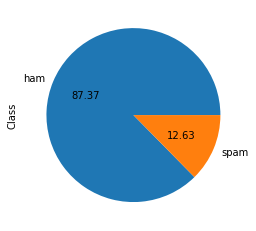

In [21]:
df_text['Class'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct="%0.2f")

In [22]:
# so the data is not balanced 

In [23]:
# Now we will add some extra columns like no. of char_, no. of words and no. of sentences

In [24]:
!pip install nltk
import nltk

In [25]:
df_text['num_characters'] = df_text['sms'].apply(len)

In [26]:
df_text.head()


,Class,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df_text['num_words'] = df_text['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df_text.head()

,Class,sms,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
# num of sentences
df_text['num_sentences'] = df_text['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df_text.head()

,Class,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df_text.describe()

,Class,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,79.344554,18.591023,1.954924
std,0.332253,58.437457,13.402840,1.366937
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,119.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [32]:
# now we can check the correlation of our class with the feature variables like num_characters, num_words, and num_sentences

In [33]:
df_text.corr()['Class']

Class             1.000000
num_characters    0.379791
num_words         0.260238
num_sentences     0.286064
Name: Class, dtype: float64

In [34]:
df_text.corr()

,Class,num_characters,num_words,num_sentences
Class,1.000000,0.379791,0.260238,0.286064
num_characters,0.379791,1.000000,0.966012,0.636644
num_words,0.260238,0.966012,1.000000,0.682956
num_sentences,0.286064,0.636644,0.682956,1.000000


<AxesSubplot:>

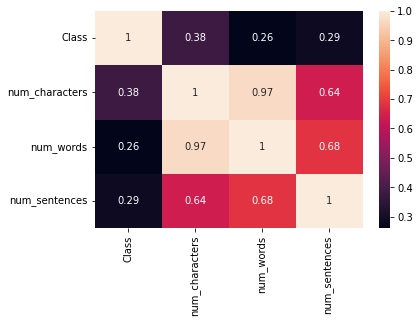

In [35]:
sns.heatmap(df_text.corr(),annot=True)

# 3. Data Preprocessing

####  1.Lower case
####  2.Tokenization
####  3. Removing special characters
####  4. Removing stop words and punctuation
####  5. Stemming

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
def transform_sms(sms):
    sms = sms.lower()
    sms = nltk.word_tokenize(sms)
    
    lst = []
    for i in sms:
        if i.isalnum():
            lst.append(i)
    
    sms = lst[:]
    lst.clear()
    
    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            lst.append(i)
            
    sms = lst[:]
    lst.clear()
    
    for i in sms:
        lst.append(ps.stem(i))
    
            
    return " ".join(lst)

In [38]:
df_text['sms'].apply(transform_sms)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: sms, Length: 5169, dtype: object

In [39]:
df_text['transformed_sms'] = df_text['sms'].apply(transform_sms)

In [40]:
df_text.head()

,Class,sms,num_characters,num_words,num_sentences,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

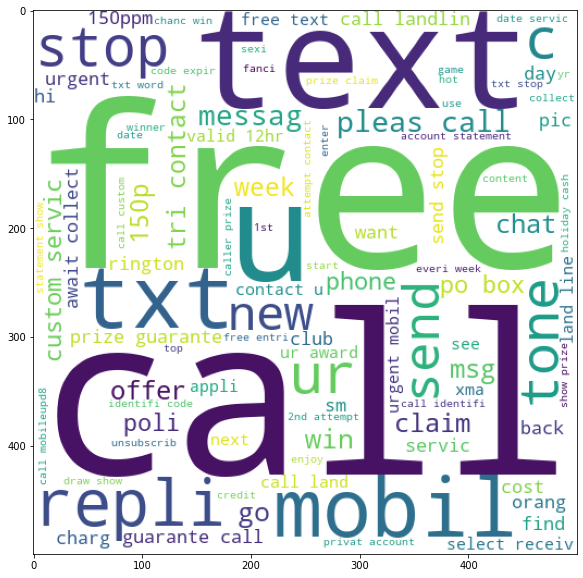

In [42]:
spam_wc = wc.generate(df_text[df_text['Class'] == 1]['transformed_sms'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

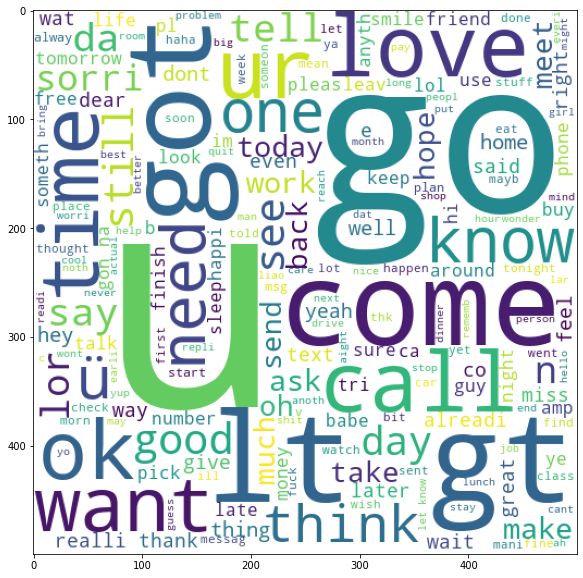

In [43]:
ham_wc = wc.generate(df_text[df_text['Class'] == 0]['transformed_sms'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [44]:
# collecting the total words that are in the spam msges
spam_corpus = []
for msg in df_text[df_text['Class'] == 1]['transformed_sms'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
spam_corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [46]:
len(spam_corpus)

9982

In [47]:
spm_crps = pd.DataFrame(spam_corpus)

In [48]:
spm_crps.value_counts()

call      320
free      191
2         155
txt       141
text      122
         ... 
lookin      1
85555       1
lone        1
logon       1
zouk        1
Length: 2234, dtype: int64

In [49]:
from collections import Counter

In [50]:
pd.DataFrame(Counter(spam_corpus).most_common(50))[0]

0         call
1         free
2            2
3          txt
4         text
5            u
6           ur
7        mobil
8         stop
9        repli
10       claim
11           4
12       prize
13         get
14         new
15      servic
16        tone
17        send
18      urgent
19       nokia
20     contact
21       award
22       phone
23        cash
24       pleas
25        week
26         win
27           c
28     collect
29         min
30    guarante
31      custom
32      messag
33         per
34        chat
35         tri
36         msg
37        draw
38      number
39          cs
40        show
41       today
42          go
43       offer
44        line
45        want
46      receiv
47      latest
48     rington
49     landlin
Name: 0, dtype: object

In [51]:
pd.DataFrame(Counter(spam_corpus).most_common(50))[1]

0     320
1     191
2     155
3     141
4     122
5     120
6     119
7     114
8     108
9     103
10     98
11     97
12     82
13     74
14     64
15     64
16     63
17     61
18     58
19     57
20     56
21     55
22     52
23     51
24     51
25     49
26     48
27     45
28     45
29     45
30     43
31     42
32     42
33     41
34     38
35     37
36     35
37     35
38     35
39     35
40     33
41     33
42     33
43     33
44     33
45     32
46     31
47     30
48     30
49     30
Name: 1, dtype: int64

C:\Users\Mukul Lawas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


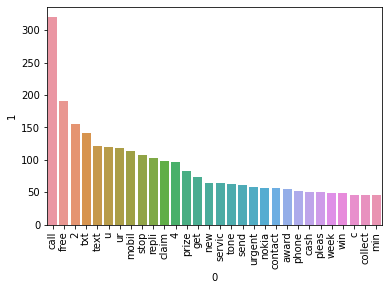

In [52]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
# collecting the total words that are in the ham msges
ham_corpus = []
for msg in df_text[df_text['Class'] == 0]['transformed_sms'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

35929

C:\Users\Mukul Lawas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


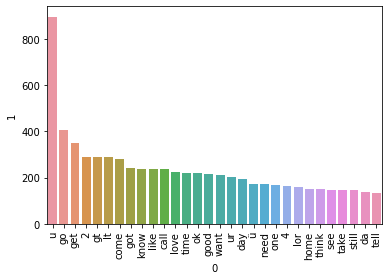

In [55]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [56]:
# Text Vectorization
# using Bag of Words

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [58]:
X = cv.fit_transform(df_text['transformed_sms']).toarray()

In [59]:
X.shape

(5169, 6782)

In [60]:
y = df_text['Class'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[794 114]
 [ 21 105]]
0.4794520547945205


In [67]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[891  17]
 [ 16 110]]
0.8661417322834646


In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95


In [69]:
# now we will perform whole steps again but with different vectorization
tfidf = TfidfVectorizer()

In [70]:
X = tfidf.fit_transform(df_text['transformed_sms']).toarray()

In [71]:
y = df_text['Class'].values

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[794 114]
 [ 22 104]]
0.47706422018348627


In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[908   0]
 [ 42  84]]
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95


In [76]:
# as we can see that with TfidfVectorizer --> mnb gives precision 100% so we will continue with this  

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9100580270793037, 1.0)

In [82]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [83]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [84]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
# performance_df

In [99]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
knc = KNeighborsClassifier()


from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[('SVM', svc), ('NB', mnb), ('KN', knc)],voting='soft')

In [101]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('SVM',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('NB', MultinomialNB()),
                             ('KN', KNeighborsClassifier())],
                 voting='soft')

In [88]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [89]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('kn', knc)]
final_estimator=RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [91]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [92]:
# so we can see our best model is SVC where precision is 1 and the accuracy is 97%

In [105]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 1.0


In [104]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))

In [102]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])